In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float, Date


In [4]:
database_path = "Resources/hawaii.sqlite"
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
#connects object to table
Base.metadata.create_all(engine)
#goes and reads database
Base.prepare(engine, reflect=True)
#shows the tables in the database
Base.classes.keys()

# reflect the tables

['measurement', 'station']

In [6]:

Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(bind=engine)



In [7]:
#the following worked but use class and object instead
#stations = engine.execute("SELECT * FROM station")
#for station in stations:
#    print(station)


In [8]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [9]:
#print all of the stations in the database
stations = session.query(Station)
for station in stations:
    print(station.name)
#how to print whole row?

WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


In [10]:
#print all of the measurements in the database
measurements = session.query(Measurement)
for measurement in measurements:
    print(measurement.station)

USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC0

USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC0

USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC0

USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC0

USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC0

USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC0

USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC0

USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC0

In [11]:
# View all of the classes that automap found
#???is this correct?
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
#???is this above...stations = session.query(Station)

In [13]:
# Create our session (link) from Python to the DB
#above?  this line....  Base.metadata.create_all(engine)

#?order

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date)).first()
date_most_recent = dt.datetime.strptime(most_recent[0], '%Y-%m-%d')
date_most_recent


datetime.datetime(2017, 8, 23, 0, 0)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#date_most_recent from above

# Calculate the date one year from the last date in data set.
date_year_ago = date_most_recent-dt.timedelta(365)
date_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [16]:
#updated the following to date and prcp
# Perform a query to retrieve the data and precipitation scores                #order here or in data frame
#prcpt_12_mo = session.query(Measurement.date, Measurement.station, Measurement.prcp,  Measurement.tobs).filter(Measurement.date>date_year_ago).order_by(Measurement.date.desc()).all()

#for prctp in prcpt_12_mo:
#    print(prctp.date, prctp.station, prctp.prcp, prctp.tobs)


# Perform a query to retrieve the data and precipitation scores                #order here or in data frame
prcpt_12_mo = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>date_year_ago).order_by(Measurement.date.desc()).all()

#prcpt_12_mo
for prctp in prcpt_12_mo:
    print(prctp.date, prctp.prcp)


2017-08-23 0.0
2017-08-23 0.0
2017-08-23 0.08
2017-08-23 0.45
2017-08-22 0.0
2017-08-22 0.0
2017-08-22 0.5
2017-08-21 0.0
2017-08-21 0.02
2017-08-21 None
2017-08-21 0.56
2017-08-20 0.0
2017-08-20 0.01
2017-08-20 None
2017-08-19 0.0
2017-08-19 0.0
2017-08-19 None
2017-08-19 0.09
2017-08-18 0.0
2017-08-18 0.0
2017-08-18 0.06
2017-08-18 None
2017-08-17 0.0
2017-08-17 0.05
2017-08-17 0.01
2017-08-17 0.13
2017-08-16 0.0
2017-08-16 0.07
2017-08-16 0.12
2017-08-16 0.42
2017-08-15 0.02
2017-08-15 0.0
2017-08-15 0.06
2017-08-15 0.32
2017-08-15 0.42
2017-08-14 0.0
2017-08-14 0.01
2017-08-14 0.08
2017-08-14 0.0
2017-08-14 0.22
2017-08-13 0.0
2017-08-13 None
2017-08-13 0.0
2017-08-13 0.0
2017-08-13 None
2017-08-12 0.0
2017-08-12 0.0
2017-08-12 0.14
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 None
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.07
2017-08-09 0.0
2017-08-09 0.0
2017-08-09 0.15
2017-08-08 0.0
2017-08-08 0.1
2017-08-08 0.0
2017-08-08 0.34
2017-08-07 0.0
2017-08-0

2017-01-14 0.01
2017-01-14 0.0
2017-01-13 0.0
2017-01-13 0.0
2017-01-13 None
2017-01-13 None
2017-01-13 0.0
2017-01-13 0.0
2017-01-12 0.0
2017-01-12 0.0
2017-01-12 None
2017-01-12 None
2017-01-12 0.0
2017-01-12 0.0
2017-01-11 0.0
2017-01-11 0.0
2017-01-11 0.0
2017-01-11 None
2017-01-11 0.0
2017-01-11 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 None
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 None
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 0.0
2017-01-08 0.0
2017-01-08 0.0
2017-01-08 0.03
2017-01-08 0.0
2017-01-08 0.0
2017-01-08 0.03
2017-01-07 0.0
2017-01-07 0.06
2017-01-07 0.0
2017-01-07 0.0
2017-01-07 0.0
2017-01-07 0.0
2017-01-06 0.0
2017-01-06 0.0
2017-01-06 0.59
2017-01-06 0.01
2017-01-06 0.1
2017-01-06 0.1
2017-01-05 0.0
2017-01-05 0.0
2017-01-05 0.0
2017-01-05 0.42
2017-01-05 0.06
2017-01-05 0.47
2017-01-04 0.0
2017-01-04 0.0
2017-01-04 0.0
2017-01-04 0.18
2017-01-04 0.0
2017-01-04 0.0
2017-01-03 0.0
2017-01-

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcpt_12_mo_df = pd.DataFrame(prcpt_12_mo[:], columns = ['date', 'prcp'])
prcpt_12_mo_df.set_index('date', inplace = True,)
prcpt_12_mo_df


,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


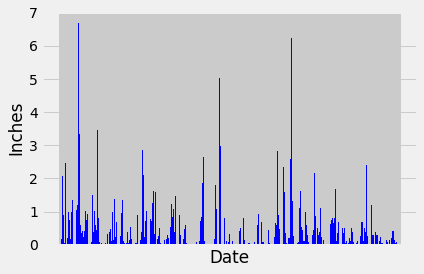

In [18]:
# Sort the dataframe by date
prcpt_12_mo_df =  prcpt_12_mo_df.sort_values('date', ascending=True)

prcpt_12_mo_df = prcpt_12_mo_df.reset_index()

# Use Pandas Plotting with Matplotlib to plot the data

#help with dates

#prcpt_12_mo_df.plot.bar(y="prcp", title = "precipitation")

date = prcpt_12_mo_df["date"]
precept = prcpt_12_mo_df["prcp"]

plt.bar(date, precept, color='b', alpha=1, align = 'center')
plt.xticks(rotation=90)              

plt.tick_params(labelbottom=False)

plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpt_12_mo_df["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
count_stations = session.query(Station.station).count()
count_stations

9

In [ ]:
#should I be doing a session.query like the following two cells.
#or should I put it in the datafram and then group and count?

In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#worked = active_stations = session.query(Measurement.station, Measurement.date).group_by(Measurement.station).all()
#active_stations = session.query(func.count(Measurement.station)).all()#, Measurement.date).group_by(Measurement.station).all()
active_stations_count = session.query(func.count(Measurement.station)).group_by(Measurement.station).all()
active_stations_count_df = pd.DataFrame(active_stations_count, columns = ['Count'])
active_stations_count_df

,Count
0,1979
1,2709
2,2202
3,2612
4,1372
5,511
6,2772
7,2724
8,2669


In [68]:
active_stations = session.query(Measurement.station).group_by(Measurement.station).all()
active_stations_df = pd.DataFrame(active_stations)
active_stations_df

,station
0,USC00511918
1,USC00513117
2,USC00514830
3,USC00516128
4,USC00517948
5,USC00518838
6,USC00519281
7,USC00519397
8,USC00519523


In [ ]:
#Is there a way to do the above seperate session.query at the same time?

In [92]:
station_count = pd.merge(active_stations_df,active_stations_count_df, left_index = True, right_index=True)
station_count = station_count.sort_values(by = ['Count'], ascending=False)
station_count

,station,Count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [93]:
station_count.iloc[0]

station    USC00519281
Count             2772
Name: 6, dtype: object

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.



In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()